# **CIS 419/519 Spring 22 - Homework 0**

**Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

In [98]:
import numpy as np
import math
import pandas as pd
import random
import math
import os
pd.options.mode.chained_assignment = None

In [99]:
# For autogreader only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")

[INFO, OK] Google Colab.


## PennGrader Setup
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**. 

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database. 

In [100]:
%%capture
!pip3 install penngrader --upgrade

In [101]:
from penngrader.grader import *

### Autograder Setup
Enter your 8-digit PennID below:

In [102]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 87030462          # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immidiately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [103]:
grader = PennGrader(homework_id = 'CIS_519_Spring22_HW0', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 87030462

Make sure this correct or we will not be able to store your grade


## **Intro to Python Libraries**
In this assignment, we will get acquainted with several important data libraries for machine learning.  The assumption here is that you have already, if necessary, done a thorough review of the basics of python, as in [this series](https://realpython.com/courses/python-turtle-beginners/).


## Imports
Let's import 3 data-related packages we will use throughout this course: numpy, pandas, and matplotlib.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Numpy

`numpy` is the typical library used to work with arrays.  You can either convert python lists into arrays, or use one of the many libraries which works with arrays, such as `sklearn` 

**Question 1a (5 points):** In the following assignment, you will create a function which returns a numpy array using the method np.array(xs), where xs is a list.  The function should take a positive integer n, and return $[e^0 = 1, e^1 = e,..., e^n]$. 

In [105]:
def exps_up_to_n(n : int):
    '''
    inputs: a number n.
    outputs: a numpy array X with shape (n + 1), such that for all i between 0 and n (inclusive), X[i] = e^i.  
    Useful functions are math.exp and range'''
    # STUDENT TODO START: 
    return np.array([math.exp(i) for i in range(n+1)])
    # STUDENT TODO END

Included in every question is one or more test cases that can be used to check if your implementation is likely to satisfy the autograder.

In [106]:
# local test case
def test_eval_exps():
    """We will have hidden values for n in the real gradescope"""
    n = 5
    val = map(int, exps_up_to_n(n)) 
    assert(list(val) == [1,2,7,20,54,148])
    
# run local test case only in the notebook
if NOTEBOOK:
  test_eval_exps()

The autograder will grade your answer with different held-out test cases. 

In [107]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_eval_exps', answer = exps_up_to_n)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Question 1b (10 points):** This simple question is designed to make you comfortable with looking up numpy functions, as well as with the autograder's "partial credit system".  You will find the mean and standard deviation of a numpy array.  Note that this can be done without numpy library functions, although it is much easier with such functions - either version will receive full points if correct.  Partial credit will be awarded if either the mean or standard deviation is computed correctly, but the other is not.

In [108]:
def mean_standard_dev_tuple_from_xs(xs : np.array):
    '''
    inputs: a numpy array xs
    outputs: a tuple (mu, sigma), where mu is the mean of xs, and sigma is the standard deviation of xs.  
    '''
    # STUDENT TODO START:
    return(np.mean(xs), np.std(xs))
    # STUDENT TODO END

In [109]:
def test_mean_standard_dev_tuple_from_xs_1():
        """We will have hidden values for xs in the real gradescope"""
        xs = [math.exp(i*2.1)/3 for i in range(10)]
        assert(int(mean_standard_dev_tuple_from_xs(xs)[0]) == 6134451)
        
def test_mean_standard_dev_tuple_from_xs_2():
        """We will have hidden values for xs in the real gradescope"""
        xs = [math.exp(i*2.1)/3 for i in range(10)]
        assert(int(mean_standard_dev_tuple_from_xs(xs)[1]) == 16017926)
        
# run test cases
if NOTEBOOK:
  test_mean_standard_dev_tuple_from_xs_1()
  test_mean_standard_dev_tuple_from_xs_2()

In [110]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_mean_variance_tuple_from_xs_1', answer = mean_standard_dev_tuple_from_xs)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [111]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_mean_variance_tuple_from_xs_2', answer = mean_standard_dev_tuple_from_xs)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Pandas
Another common way of organizing code is with the Pandas library.  Pandas represents data as DataFrames and Series, where Series are vectors of dara and DataFrames represent labeled sets of Series.  We'll use a dataframe provided by a data collection in a library called seaborn.

In [112]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This dataset is one of the most commonly used introductions to data science.  It involves 4 features, which are all real numbers between 0 and some maximum size.  Later, we'll learn how to use those features to predict a label associated with each data point (what type of flower it represents).  For now, we'll learn how to find the subset of the data with a given label.

In [113]:
iris.iloc[np.where(iris["species"] == "setosa")[0]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


**Question 2 (10 points)**: Your assignment is to write a function which takes a flower class (one of either "setosa", "versicolor" or "virginica" and a number $n$, and return the mean sepal length of the top n flowers of that class, sorted by sepal width (so the mean sepal length of the n flowers with the highest sepal width out of all flowers in the class.)

In [114]:
def get_mean_sepal_length_from_class_top_n_width(iris, flower_class:str, n:int):
    '''
    inputs: the iris dataset, a flower_class string and a positive integer
    output: a floating point number
    using the iris dataset provided above as a pandas DataFrame, 
    a) obtain only those datapoints which correspond to the given class
    b) find the top n of that subset according to sepal width
    c) return the mean sepal length of that smaller subset
    '''
    # STUDENT TODO START:
    return iris[iris["species"] == flower_class].sort_values(by="sepal_width", ascending=False).head(n)['sepal_length'].mean()
    # STUDENT TODO END

In [115]:
def test_get_mean():
    """We will have hidden values for species and n in the real gradescope"""
    n = 5
    species = "setosa"
    species_top_n = [5.7, 5.5, 5.2, 5.8, 5.4]
    species_mean = round(get_mean_sepal_length_from_class_top_n_width(iris, species, n), 2)
    assert (species_mean == 5.52)
    
# run test case
if NOTEBOOK:
  test_get_mean()

In [116]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_get_mean', answer = get_mean_sepal_length_from_class_top_n_width)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Question 3 (10 points):** Your next task is to take a subset of the iris dataset and return a copy of a modified dataset that has an integer-valued instead of a string-valued "species" column, where 0 corresponds to "setosa", 1 corresponds to "versicolor", and 2 corresponds to "virginica".  As we will learn, using "integer-based categorical representations" is quite useful in many classification tasks and other types of tasks involving variables associated with different categories.

In [117]:
def string_to_categorical_int(iris, n : int):
    '''
    input: the iris dataset, a positive integer n
    output: a new dataframe df2 which contains the same data as df except
    a) only the first n examples of each species are retained
    b) the species labels are converted from strings to integers between 0 and 2 according to the above scheme
    '''
    # STUDENT TODO START:
    return iris.groupby(by="species").head(n).replace({"species": {"setosa": 0, "versicolor": 1, "virginica": 2}})
    # STUDENT TODO END

In [118]:
def test_string_to_cat1():
        """We will have hidden values for species, n and column in the real gradescope"""
        n = 5
        df2 = string_to_categorical_int(iris, n)
        species = "setosa"
        species_cat = {"setosa":0, "versicolor":1, "virginica":2}[species]
        column = "species"
        assert (df2[column].tolist() == [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
        
def test_string_to_cat2():
        n = 5
        """We will have hidden values for species, n and column in the real gradescope"""
        df2 = string_to_categorical_int(iris, n)
        species = "setosa"
        species_cat = {"setosa":0, "versicolor":1, "virginica":2}[species]
        column = "sepal_length"
        column_vals_df2 = [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 6.3, 5.8, 7.1, 6.3, 6.5]
        assert (df2[column].tolist() == column_vals_df2)
        
def test_string_to_cat3():
        """We will have hidden values for n in the real gradescope"""
        n = 5
        df2 = string_to_categorical_int(iris, n)
        assert (np.all(df2.columns == iris.columns))
        
# run test cases
if NOTEBOOK:
  test_string_to_cat1()
  test_string_to_cat2()
  test_string_to_cat3()

In [119]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_string_to_cat1', answer = string_to_categorical_int)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [120]:
grader.grade(test_case_id = 'test_string_to_cat2', answer = string_to_categorical_int)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [121]:
grader.grade(test_case_id = 'test_string_to_cat3', answer = string_to_categorical_int)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Matplotlib

**Question 4 (15 points):** 
This exercise is designed to familiarize you with plotting data in [matplotlib](https://matplotlib.org/), a Python graphing library used extensively in academia and industry, which is pre-installed on Google Colab. You will generate a scatter plot of Mars' Declimation vs Time using Tycho Brahe's observational data recorded from 1582 to 1600 (an example of the plot is shown below), using Matplotlib. We have provided starter code that will download the data and process it into Pandas dataframe.

The data should be plotted as a scatter plot with angle of declination on the Y axis and days since the initial observation on the X axis, using a `+` shaped marker, each data point with a transparency of 0.25 (look at the `alpha` property of the scatter plot function),  with the data for each Volume of Tycho Brahe's notes plotted in a different color and labeled properly in the graph legend in the lower right (look at filtering on categorical variables in Pandas and look at the `label` property of the scatter plot function to set a legend label). The graph should be titled and each axis labeled as shown, and grid lines should be plotted with a transparency of 0.25 (look at the `alpha` property of the grid function), and it should be 12 inches wide and 5 inches tall (look at the `set_size_inches` function). Embed a picture of your figure (a `.png` can be downloaded from Colab) at the end of your solution to the written problem set; it should be identical to the figure below, sans the "Homework Example" watermark.



---

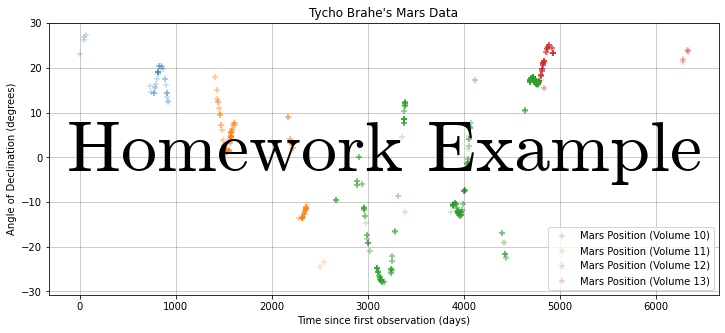


In [122]:
# load data
!wget http://www.pafko.com/tycho/mars.xls
df = pd.read_excel("mars.xls", usecols="F,O,U", skiprows=5)
df['Time Deltas'] = df['Days since 1 AD'] - df['Days since 1 AD'].min()
df.head()

--2022-01-13 03:32:24--  http://www.pafko.com/tycho/mars.xls
Resolving www.pafko.com (www.pafko.com)... 216.71.120.41
Connecting to www.pafko.com (www.pafko.com)|216.71.120.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365056 (356K) [application/vnd.ms-excel]
Saving to: ‘mars.xls.1’

mars.xls.1          100%[===================>] 356.50K   815KB/s    in 0.4s    

2022-01-13 03:32:25 (815 KB/s) - ‘mars.xls.1’ saved [365056/365056]



,Volume,Days since 1 AD,Declination,Time Deltas
0,10,578150.500000,23.116667,0.000000
1,10,578198.500000,26.933333,48.000000
2,10,578195.500000,26.372222,45.000000
3,10,578217.500000,27.300000,67.000000
4,10,578883.059722,15.900000,732.559722


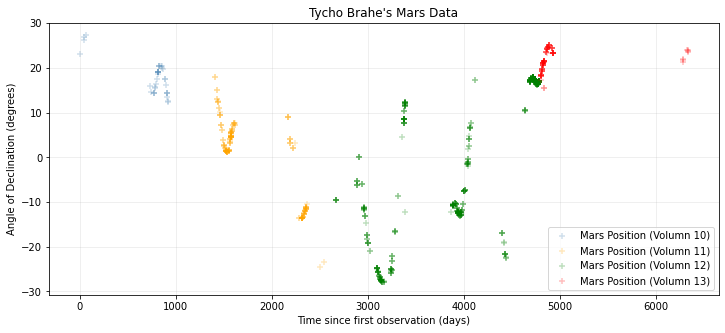

In [123]:
# STUDENT TODO START:
plt.figure().set_size_inches(12, 5)
plt.scatter(x=df[df['Volume'] == 10]['Time Deltas'], y=df[df['Volume'] == 10]['Declination'], c='steelblue', marker='+', alpha=0.25, label='Mars Position (Volumn 10)')
plt.scatter(x=df[df['Volume'] == 11]['Time Deltas'], y=df[df['Volume'] == 11]['Declination'], c='orange', marker='+', alpha=0.25, label='Mars Position (Volumn 11)')
plt.scatter(x=df[df['Volume'] == 12]['Time Deltas'], y=df[df['Volume'] == 12]['Declination'], c='green', marker='+', alpha=0.25, label='Mars Position (Volumn 12)')
plt.scatter(x=df[df['Volume'] == 13]['Time Deltas'], y=df[df['Volume'] == 13]['Declination'], c='red', marker='+', alpha=0.25, label='Mars Position (Volumn 13)')
plt.legend(loc=4)
plt.title("Tycho Brahe's Mars Data")
plt.xlabel("Time since first observation (days)")
plt.ylabel("Angle of Declination (degrees)")
plt.grid(alpha=0.25)
# STUDENT TODO END

## Submit to Gradescope
Congratulation on completing HW0 coding assignment! The last step you need to do is to download this iPython notebook, rename it as **hw0.ipynb** and submit it to [Gradescope](https://www.gradescope.com). Note: Gradescope will automatically re-run your submitted notebook.

*In order to download the notebook from Google Colab, click File->Download->Download .ipynb*
